In [1]:
from IPython.display import display
import spot
spot.setup()

In [2]:
a = spot.translate('a U b')
for fmt in ('hoa', 'spin', 'dot', 'lbtt'):
    print(a.to_str(fmt))

HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc deterministic
properties: stutter-invariant terminal
--BODY--
State: 0 {0}
[t] 0
State: 1
[1] 0
[0&!1] 1
--END--
never {
T0_init:
  if
  :: (b) -> goto accept_all
  :: ((a) && (!(b))) -> goto T0_init
  fi;
accept_all:
  skip
}

digraph G {
  rankdir=LR
  node [shape="circle"]
  node [style="filled", fillcolor="#ffffaa"]
  fontname="Lato"
  node [fontname="Lato"]
  edge [fontname="Lato"]
  size="10.2,5" edge[arrowhead=vee, arrowsize=.7]
  I [label="", style=invis, width=0]
  I -> 1
  0 [label=<0>, peripheries=2]
  0 -> 0 [label=<1>]
  1 [label=<1>]
  1 -> 0 [label=<b>]
  1 -> 1 [label=<a &amp; !b>]
}

2 1
0 1 -1
1 "b"
0 & "a" ! "b"
-1
1 0 0 -1
1 t
-1



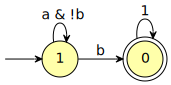

In [3]:
a.save('example.aut').save('example.aut', format='lbtt', append=True)

In [4]:
!cat example.aut

HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc deterministic
properties: stutter-invariant terminal
--BODY--
State: 0 {0}
[t] 0
State: 1
[1] 0
[0&!1] 1
--END--
2 1
0 1 -1
1 "b"
0 & "a" ! "b"
-1
1 0 0 -1
1 t
-1


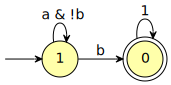

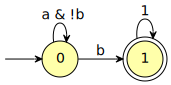

In [5]:
for a in spot.automata('example.aut'):
    display(a)

Test `--ABORT--`
----------------

In [6]:
%%file example.aut
HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
--BODY--
State: 0 {0}
[t] 0
--ABORT--   /* the previous automaton should be ignored */
HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
Acceptance: 1 Inf(0)
--BODY--
State: 0 {0}
[t] 0
State: 1
[1] 0
[0&!1] 1
--END--

Overwriting example.aut


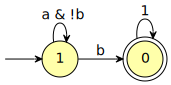

In [7]:
for a in spot.automata('example.aut'):
    display(a)

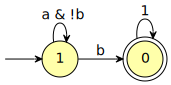

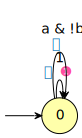

In [8]:
for a in spot.automata("""
HOA: v1
States: 2
Start: 1
name: "Hello world"
AP: 2 "a" "b"
Acceptance: 1 Inf(0)
--BODY--
State: 0 {0}
[t] 0
State: 1
[1] 0
[0&!1] 1
--END--
HOA: v1
States: 1
Start: 0
name: "Hello world 2"
AP: 2 "a" "b"
Acceptance: 2 Inf(0)&Inf(1)
--BODY--
State: 0 {0}
[t] 0 {1}
[0&!1] 0
--END--
"""):
    display(a)

Test syntax errors
------------------

In [9]:
%%file example.aut
HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
--BODY--
State: 0 {0}
[t] 1
State: 1
[t] 1
--END--
HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
Acceptance: 1 Inf(0)
--BODY--
State: 0 {0}
[a] 3
State: 1
[1] 0
[0&!1] 1
--END--

Overwriting example.aut


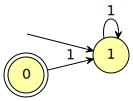

SyntaxError: 
example.aut:20.2: syntax error, unexpected identifier
example.aut:20.1-3: ignoring this invalid label
example.aut:20.5: state number is larger than state count...
example.aut:14.1-9: ... declared here.
 (<string>)

In [10]:
for a in spot.automata('example.aut'):
    display(a)

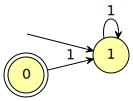

In [11]:
spot.automaton('example.aut', timeout=100)

In [12]:
spot.automaton('non-existing-cmd |')

CalledProcessError: Command 'non-existing-cmd ' returned non-zero exit status 127.

In [13]:
spot.automaton('sleep 3; cat example.aut |', timeout=1)

TimeoutExpired: Command 'sleep 3; cat example.aut ' timed out after 1 seconds

In [14]:
rm example.aut